In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns
from timeit import timeit

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import tensorflow.keras.layers as tfl

In [2]:
training_data = pd.read_csv('sign_mnist_train.csv')
test_data = pd.read_csv('sign_mnist_test.csv')

In [3]:
X_train = training_data.drop(labels = ["label"],axis = 1) 
Y_train = training_data["label"]

In [4]:
X_test = test_data.drop(labels = ["label"],axis = 1)
Y_test = test_data["label"]

In [7]:
import time
start = time.time()
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

reg = model.fit(X_train,Y_train)

Y_pred = model.predict(X_test)
stop = time.time()
diff=stop-start
print(diff)

102.9801390171051


D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
from sklearn.metrics import classification_report

report = classification_report(Y_test, Y_pred,output_dict=True)

classification_report_BMLPC2 = pd.DataFrame.from_dict(report)
classification_report_BMLPC2
score_classification_report_BMLPC2=classification_report_BMLPC2['macro avg']

In [20]:
print(type(score_classification_report_BMLPC2))

<class 'pandas.core.series.Series'>


In [23]:
df = score_classification_report_BMLPC2.to_frame()

In [39]:
df_T = df.T
df_T.drop(columns=["support"],inplace=True)

In [40]:
df_T

,precision,recall,f1-score
macro avg,0.669184,0.660901,0.655057


<AxesSubplot:>

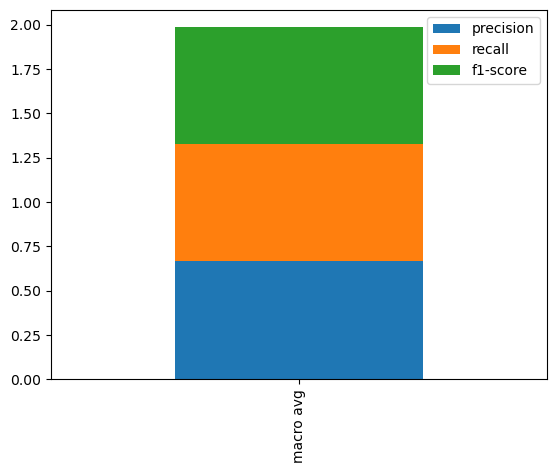

In [41]:
df_T.plot( kind='bar', stacked=True)

,High Temp,Low Temp,Avg Temp
Jan,28,22,25
Feb,30,26,28
Mar,34,30,32
Apr,38,32,35
May,45,41,43
Jun,42,38,40
Jul,38,32,35
Aug,35,31,33
Sep,32,28,30
Oct,28,22,25


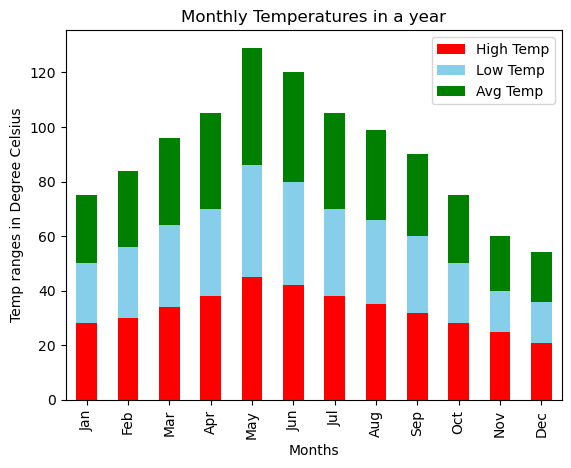

In [33]:
df2 = pd.DataFrame({'High Temp': [28, 30, 34, 38, 45, 42,
                                 38, 35, 32, 28, 25, 21],
                   'Low Temp': [22, 26, 30, 32, 41, 38,
                                32, 31, 28, 22, 15, 15],
                   'Avg Temp': [25, 28, 32, 35, 43, 40,
                                35, 33, 30, 25, 20, 18]},
                  index=['Jan', 'Feb', 'Mar', 'Apr', 'May',
                         'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
                         'Nov', 'Dec'])
# create stacked bar chart for monthly temperatures
df2.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green'])
 
# labels for x & y axis
plt.xlabel('Months')
plt.ylabel('Temp ranges in Degree Celsius')
 
# title of plot
plt.title('Monthly Temperatures in a year')
df2